# CME538 - Introduction to Data Science

## Tutorial 10 - PCA and K-means Clustering 
By Soroush Sobhkhiz

### Tutorial Structure


1. [Reading data and exploratory data analysis](#section1)
    - EDA
    - Filling Null values in a case-dependent way

2. [K-means clustering](#section2)
    - What is K-means clustering?
    - K-means with sklearn

2. [PCA](#section3)
    - What is PCA?
    - PCA with sklearn

3. [K-means with PCA components](#section4)
    - How to pick the number of clusters

***    
This notebook is mainly based on:

[[1]](https://builtin.com/data-science/step-step-explanation-principal-component-analysis) A Step-by-Step Explanation of Principal Component Analysis

[[2]](https://github.com/allisonhorst/palmerpenguins) palmerpenguins 

[[3]](https://www.codecademy.com/articles/principal-component-analysis-intro)
Principal Component Analysis

<a id='section0'></a>
## Setup Notebook
First, we need to import the Python packages we plan to use.


In [3]:
import warnings
warnings.filterwarnings('ignore') #Uncomment these if you want to ignore the warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 
# import warnings

# warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_context("notebook")

The `palmerpenguins` data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.
These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. 

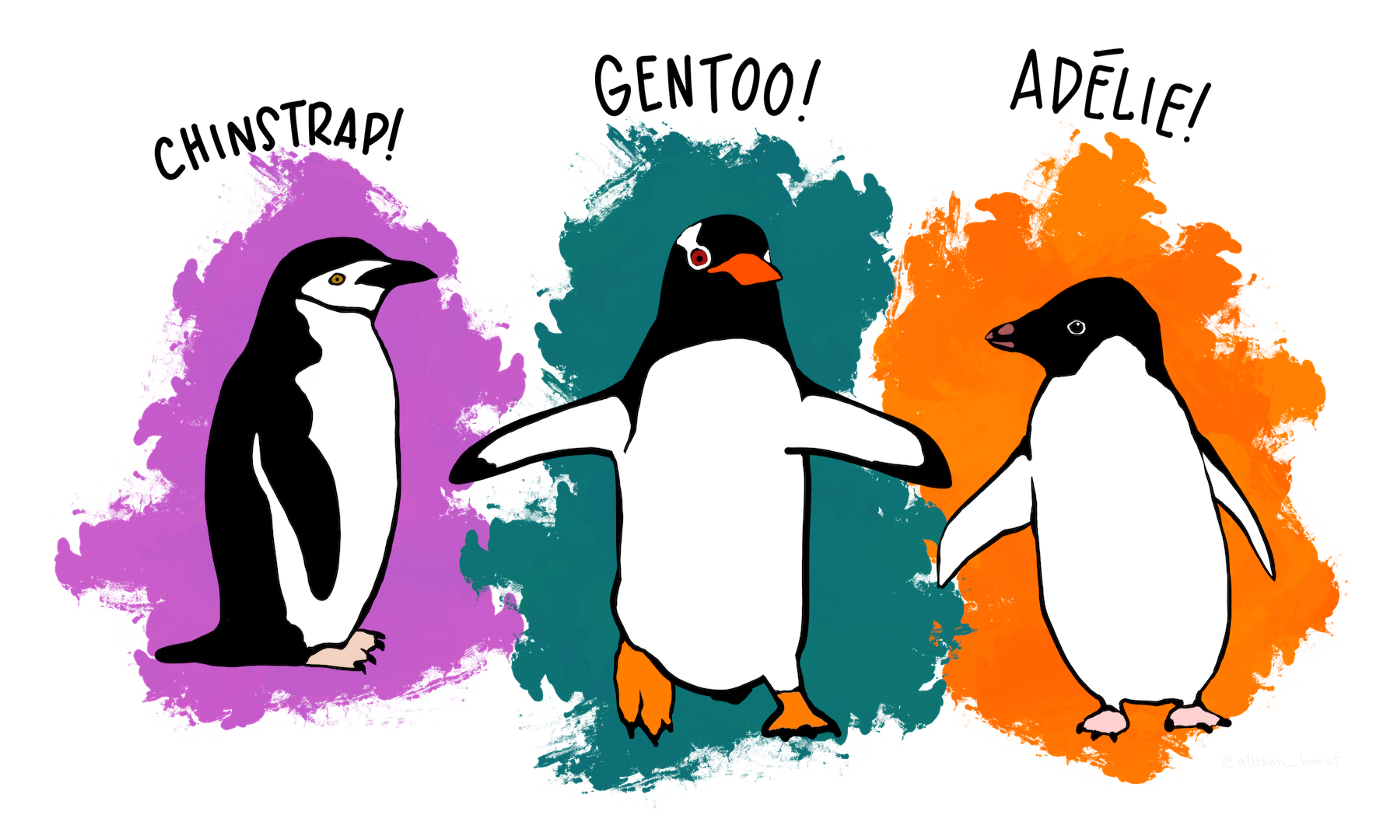

<a id='section1'></a>

# Reading data and exploratory data analysis

The next step after importing the Python packages is to import the dataset. We use the Palmer Penguins dataset for this tutorial. 

In [8]:
penguins_df = pd.read_csv('PalmerPenguins.csv',index_col=0)
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [9]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


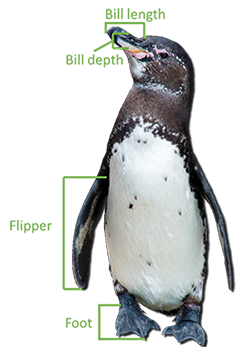
from https://www.galapagos.org/blog/the-measure-of-a-penguin/

### EDA

Let's look at the specieis

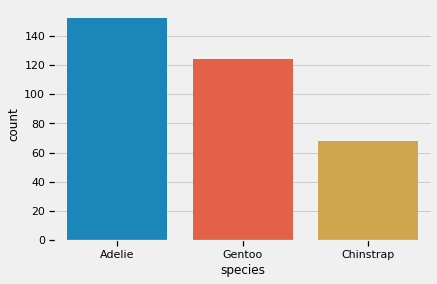

In [10]:
#exploring the data
sns.countplot(x='species',data=penguins_df)

Let's break it down into different sexes by using a grouped bar plot

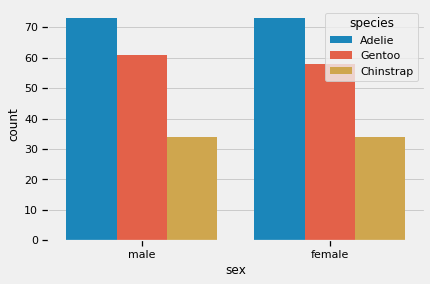

In [12]:
#Species count by sex
sns.countplot(x='sex',data=penguins_df,hue='species')

Now let's use boxplots to compare bill and flipper lengths

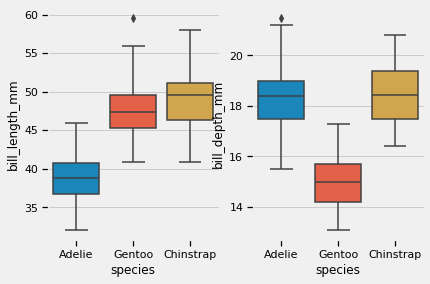

In [19]:
fig, axs =plt.subplots(ncols=2)

sns.boxplot(y='bill_length_mm',x='species',data=penguins_df,ax=axs[0])
sns.boxplot(y='bill_depth_mm',x='species',data=penguins_df,ax=axs[1])

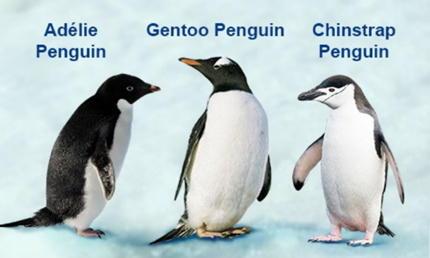
from https://rstudio-pubs-static.s3.amazonaws.com/645189_a1a95705346d434f90fcb19d2d52bad5.html

Now let's see flipper length and weight

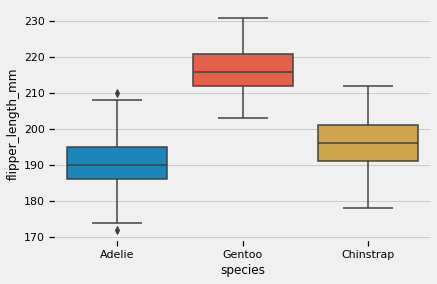

In [20]:
#flipper length by species

sns.boxplot(x = 'species', y = 'flipper_length_mm', data = penguins_df);


Gentoo species has the longest flippers while Adelie has the shortest

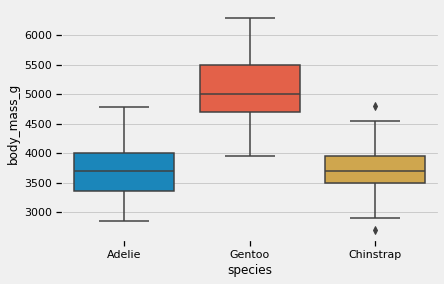

In [24]:
#body mass of different Species

sns.boxplot(x = 'species', y = 'body_mass_g', data = penguins_df);

Gentoo are the heaviest of the three species whereas Adelie and Chinstrap weigh around the same

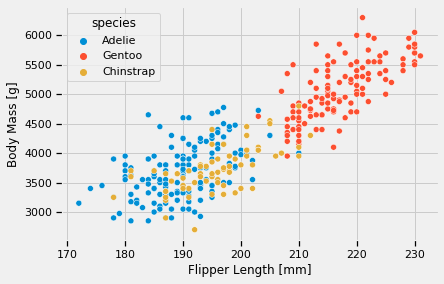

In [25]:
fig = sns.scatterplot(
    x="flipper_length_mm", 
    y="body_mass_g",
    hue="species",
    data=penguins_df)
fig.set_xlabel('Flipper Length [mm]')
fig.set_ylabel('Body Mass [g]');

## Handling Null values

In [26]:
#null values
penguins_df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Looking at the number of non-null values, the size data has 2 null values and the sex has 11. 

### Let's make it a little more detialed

We can either drop these values or replace them with another value, The number of instances with missing values in the sex columns is relatively large, so we need to do something about that, but we can drop the other features.

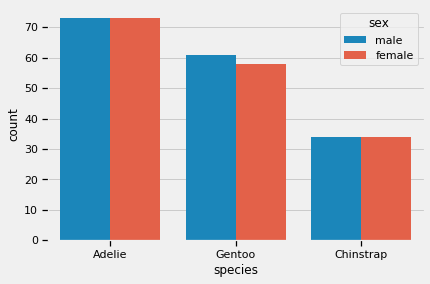

In [27]:
#Species count by sex

sns.countplot(x='species',data=penguins_df,hue='sex')

In [28]:
penguins_df[penguins_df['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


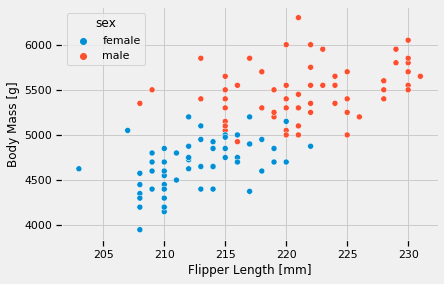

In [29]:
fig = sns.scatterplot(
    x="flipper_length_mm", 
    y="body_mass_g",
    hue="sex",
    data=penguins_df[penguins_df['species'] == 'Gentoo'])
fig.set_xlabel('Flipper Length [mm]')
fig.set_ylabel('Body Mass [g]');

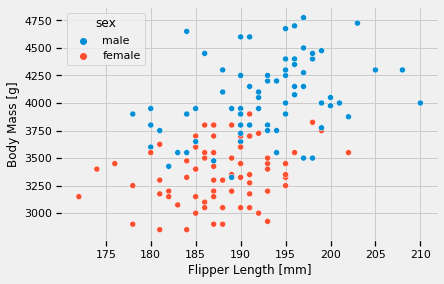

In [30]:
fig = sns.scatterplot(
    x="flipper_length_mm", 
    y="body_mass_g",
    hue="sex",
    data=penguins_df[penguins_df['species'] == 'Adelie'])
fig.set_xlabel('Flipper Length [mm]')
fig.set_ylabel('Body Mass [g]');

except for the 10th penguine indexed 10, the rest are femaile penguins.

In [31]:
penguins_df['sex'].fillna('female',inplace=True)
penguins_df.loc[10,'sex'] = 'male'

In [32]:
penguins_df.loc[10,:]

species                 Adelie
island               Torgersen
bill_length_mm            42.0
bill_depth_mm             20.2
flipper_length_mm        190.0
body_mass_g             4250.0
sex                       male
year                      2007
Name: 10, dtype: object

now we can go ahead and drop the rest of the values

In [33]:
penguins_df.dropna(inplace=True)
penguins_df.reset_index()
print(penguins_df.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [34]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.0+ KB


#### HeatMap

It's always a good idea to a correlation analysis in EDA

In [35]:
correlation = penguins_df.corr()

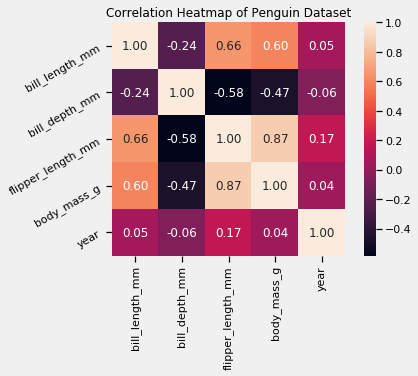

In [36]:
plt.title('Correlation Heatmap of Penguin Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

We can see that there is a good correlation between some of the features. In other words, some features can be represented by other features and we might not need them in our future models.

<a id='section2'></a>
## K-Means clustering

### What is  K-means Clustring?
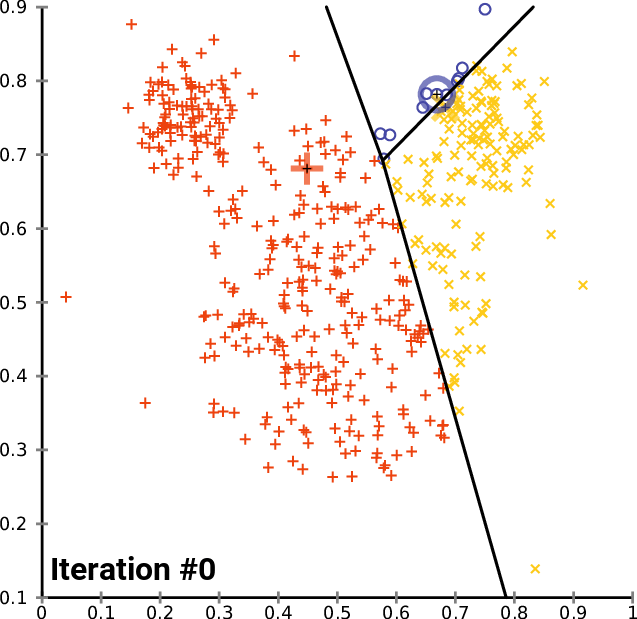
from https://commons.wikimedia.org/wiki/File:K-means_convergence.gif

K-Means Clustering is an unsupervised machine learning algorithm. In contrast to supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

### A naieve K-means

In [37]:
X = pd.get_dummies(penguins_df)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
1,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
2,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
3,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
5,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
6,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1


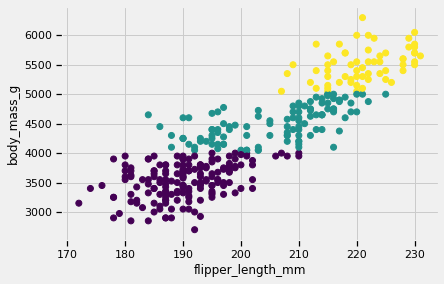

In [43]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter = 300 , random_state=0)
pred_y = kmeans.fit_predict(X)

plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c = pred_y)

plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")
plt.show()

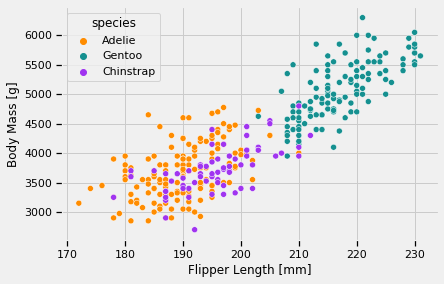

In [44]:
fig = sns.scatterplot(
    x="flipper_length_mm", 
    y="body_mass_g",
    hue="species",
    data=penguins_df, palette=['#FF8C00','#159090','#A034F0'])
fig.set_xlabel('Flipper Length [mm]')
fig.set_ylabel('Body Mass [g]');

In [45]:
#now let's use the subset of numeric features
X = penguins_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']] 
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
1,39.1,18.7,181.0,3750.0
2,39.5,17.4,186.0,3800.0
3,40.3,18.0,195.0,3250.0
5,36.7,19.3,193.0,3450.0
6,39.3,20.6,190.0,3650.0


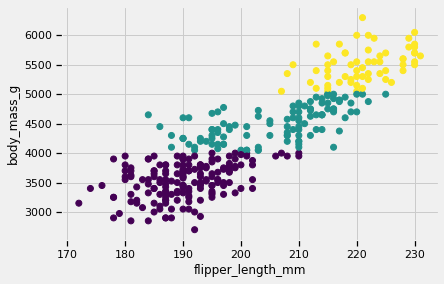

In [46]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c = pred_y)

plt.xlabel("flipper_length_mm")
plt.ylabel("body_mass_g")
plt.show()

#### NOT good! Let's see what we can do

<a id='section3'></a>

# PCA

## What is PCA?
[visualization](https://setosa.io/ev/principal-component-analysis/)

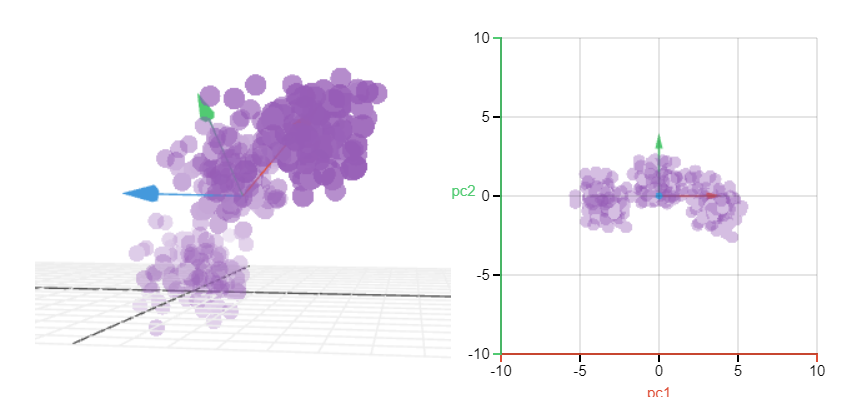
- Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
- Reduce the number of variables of a data set, while preserving as much information as possible
- The first principal component accounts for the largest possible variance in the data set
- The projection of the points is the most spread out. Or mathematically speaking, it’s the line that maximizes the variance (the average of the squared distances from the projected points to the origin).
- The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.

Step 1: Standardization

Step 2: Covariance Matrix computation

Step 3: Covariance Matrix Eigenvectors and Eigenvalues Computation of 

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

## PCA with sklearn

### Scale the data

In [47]:
random_state = 0
pca_scaled = make_pipeline(StandardScaler(),PCA(random_state=random_state))

Let us subset the data to contain only numeric data for PCA.

In [48]:
penguins_pc_scaled = pca_scaled.fit_transform(penguins_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])

In [49]:
pd.DataFrame(penguins_pc_scaled)

,0,1,2,3
0,-1.843445,0.047702,-0.232794,0.523903
1,-1.306762,-0.428348,-0.029562,0.402426
2,-1.369181,-0.154476,0.198672,-0.528007
3,-1.878827,-0.002048,-0.618596,-0.478378
4,-1.911748,0.829210,-0.686584,-0.207428
...,...,...,...,...
337,0.565610,2.352188,0.891489,-0.394346
338,-0.732380,0.253368,0.328192,-0.733235
339,-0.355706,0.999910,0.897282,0.195026
340,0.502033,1.491983,0.346226,-0.554713


In [51]:
components = pca_scaled.named_steps['pca'].components_
components = pd.DataFrame(components)

In [52]:
components.index = ['Comp1', 'Comp2', 'Comp3', 'Comp4']
components.columns =  ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
components

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
Comp1,0.455250,-0.400335,0.576013,0.548350
Comp2,0.597031,0.797767,0.002282,0.084363
Comp3,0.644301,-0.418427,-0.232084,-0.596600
Comp4,0.145523,-0.167986,-0.783799,0.579882


This output tells us that the first principal component, for example, can be calculated as 0.455*bill_length_mm - 0.400*bill_depth_mm + 0.576*flipper_length_mm + 0.548*body_mass_g. Looking at the principal components themselves can tell us which variables are most responsible for variation in the data. For example, flipper length is weighted most highly in the first component; however, bill depth is weighted most highly in the second. 

In [56]:
var_ratio = pca_scaled.named_steps['pca'].explained_variance_ratio_ *100
var_ratio= pd.DataFrame(var_ratio).transpose()
var_ratio.columns = ['Comp1','Comp2','Comp3','Comp4']
var_ratio.index=['Proportion of Variance']
var_ratio

,Comp1,Comp2,Comp3,Comp4
Proportion of Variance,68.843878,19.312919,9.130898,2.712305


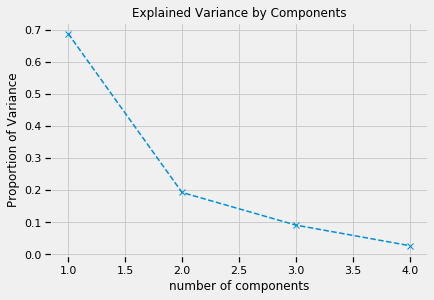

In [57]:
plt.plot(range(1,5), pca_scaled.named_steps['pca'].explained_variance_ratio_, marker = 'x', linestyle= '--')
plt.title('Explained Variance by Components')
plt.xlabel('number of components')
plt.ylabel('Proportion of Variance');

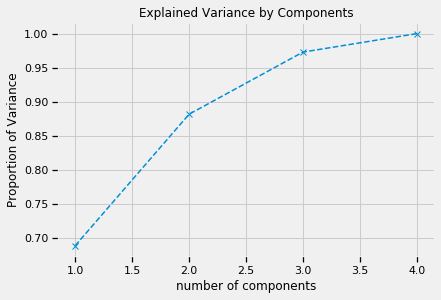

In [59]:
plt.plot(range(1,5), pca_scaled.named_steps['pca'].explained_variance_ratio_.cumsum(), marker = 'x', linestyle= '--')
plt.title('Explained Variance by Components')
plt.xlabel('number of components')
plt.ylabel('Proportion of Variance');

The first two components combined account for 69+19 = 88% of the overall variation, while the first three account for 69+19+9 = 97%. Based on this information, a data scientist would need to make a judgement about how many principal components to keep. At the very least, it seems reasonable to get rid of component 4 and retain only 3 variables that still describe 97% of the variation in the data.



In [61]:
penguins_df_pca = pd.DataFrame(penguins_pc_scaled).iloc[:,:3]
penguins_df_pca.columns = ['Comp1','Comp2','Comp3']
penguins_df_pca.head()

,Comp1,Comp2,Comp3
0,-1.843445,0.047702,-0.232794
1,-1.306762,-0.428348,-0.029562
2,-1.369181,-0.154476,0.198672
3,-1.878827,-0.002048,-0.618596
4,-1.911748,0.829210,-0.686584


Now let's visualize the specieis using the components we just got

In [62]:
penguins_info = penguins_df.select_dtypes(exclude = 'float')
penguins_info.reset_index(inplace=True)
penguins_info.head()

,index,species,island,sex,year
0,1,Adelie,Torgersen,male,2007
1,2,Adelie,Torgersen,female,2007
2,3,Adelie,Torgersen,female,2007
3,5,Adelie,Torgersen,female,2007
4,6,Adelie,Torgersen,male,2007


In [64]:
Penguins_df_pca_all = pd.DataFrame(penguins_pc_scaled).iloc[:,:3]
Penguins_df_pca_all.columns = ['Comp1','Comp2','Comp3']
Penguins_df_pca_all['Species'] = penguins_info['species']
Penguins_df_pca_all['Sex'] = penguins_info['sex']
Penguins_df_pca_all.head()

,Comp1,Comp2,Comp3,Species,Sex
0,-1.843445,0.047702,-0.232794,Adelie,male
1,-1.306762,-0.428348,-0.029562,Adelie,female
2,-1.369181,-0.154476,0.198672,Adelie,female
3,-1.878827,-0.002048,-0.618596,Adelie,female
4,-1.911748,0.829210,-0.686584,Adelie,male


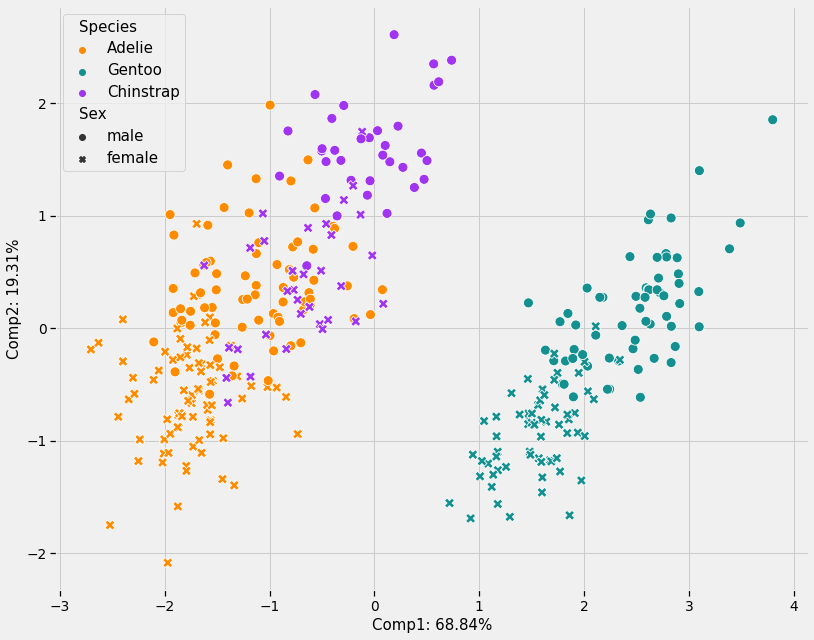

In [66]:
plt.figure(figsize=(12,10))
with sns.plotting_context("notebook",font_scale=1.25):
    sns.scatterplot(x="Comp1", y="Comp2",
                    data=Penguins_df_pca_all, 
                    hue="Species",
                    style="Sex",
                    s=100,palette=['#FF8C00','#159090','#A034F0'])
    plt.xlabel("Comp1: "+ str(np.round(var_ratio['Comp1'].values[0],2))+"%")
    plt.ylabel("Comp2: "+ str(np.round(var_ratio['Comp2'].values[0],2))+"%")

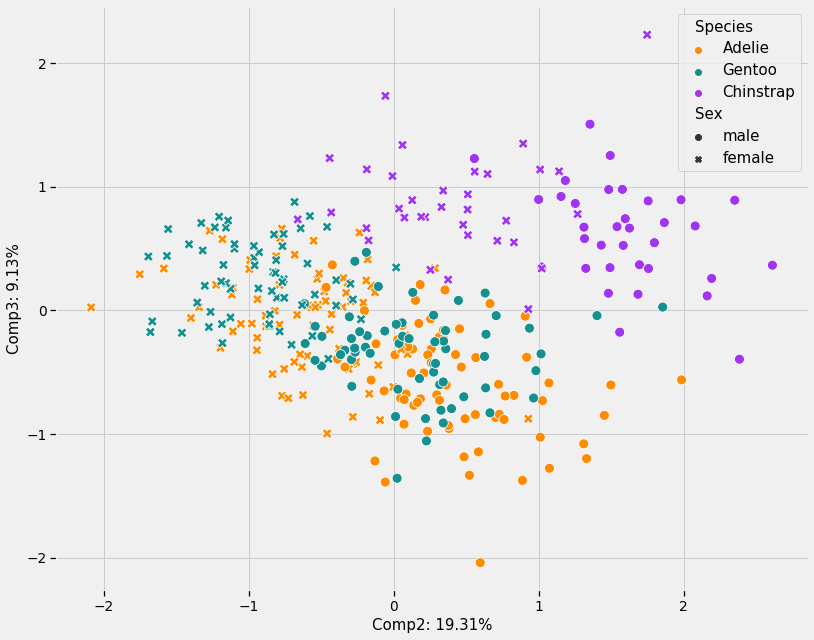

In [67]:
plt.figure(figsize=(12,10))
with sns.plotting_context("notebook",font_scale=1.25):
    sns.scatterplot(x="Comp2", y="Comp3",
                    data=Penguins_df_pca_all, 
                    hue="Species",
                    style="Sex",
                    s=100,palette=['#FF8C00','#159090','#A034F0'])
    plt.xlabel("Comp2: "+ str(np.round(var_ratio['Comp2'].values[0],2))+"%")
    plt.ylabel("Comp3: "+ str(np.round(var_ratio['Comp3'].values[0],2))+"%")

<a id='section4'></a>

# K-means Clustring with PCA components

In [68]:
X = penguins_df_pca

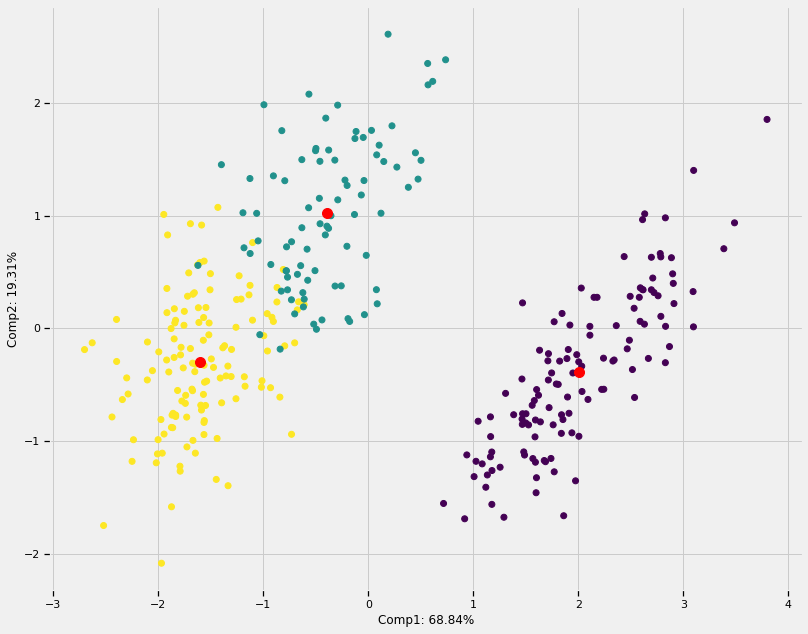

In [69]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(12,10))
plt.scatter(X['Comp1'], X['Comp2'], c = pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel("Comp1: "+ str(np.round(var_ratio['Comp1'].values[0],2))+"%")
plt.ylabel("Comp2: "+ str(np.round(var_ratio['Comp2'].values[0],2))+"%")
plt.show()

## Best number of clusters?

#### Elbow method

In this case, we already knew the number of expected clusters, but what if we didn't!

There are various ways to detect the optimal number of clusters depending on the number of clusters and the purpose of clustering. For instance, we have the elbow method in which we calculate average distances to the centroid across all data points for different number of clusters and then plot the results.

The common measure to use is 'inertia', which is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
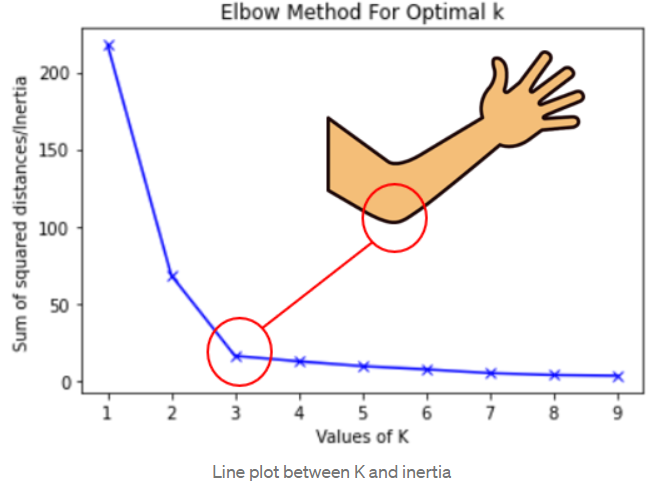


#### Silhouette measure

Another method is when we caluclate a measure for between/within cluster siilarity. The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
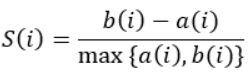
S(i) is the silhouette coefficient of the data point i.

a(i) is the average distance between i and all the other data points in the cluster to which i belongs.

b(i) is the average distance from i to all clusters to which i does not belong.

We calculate the average score for all clusters and then compute the coefficient for k number of clusters (the number is between -1 and 1). The higher the better.

from https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

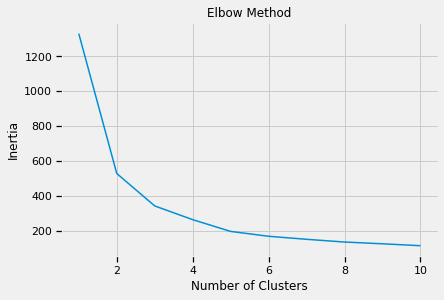

In [70]:
inertia = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()